In [15]:
import torch

import numpy as np
import matplotlib.pyplot as plt

from data import DataGenerator
from model import Regressor

In [18]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Create data generator
generator = DataGenerator(128, 4)

# Create model
model = Regressor(128, hidden_dim=512, num_layers=3).to(device)

# Create optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

# Create loss function
criterion = torch.nn.MSELoss()

num_epochs = 3000

In [19]:

batch_size = 1000
data = generator.sample(20000)


for epoch in range(num_epochs):

        losses = []

        for batch_idx in range(0, len(data), batch_size):
                
                # Zero out gradients
                optimizer.zero_grad()

                # Sample data
                samples, scores, mode_idx = [data[i][batch_idx:batch_idx+batch_size] for i in range(3)]

                # Move data to device
                samples = samples.to(device)
                scores = scores.to(device)

                # Get model outputs 
                outputs, _ = model(samples)

                # Compute loss
                loss = criterion(outputs, scores)

                # Compute gradients
                loss.backward()

                # Save loss
                losses.append(loss.item())

                # Update parameters
                optimizer.step()

        # Mean loss
        loss = np.mean(losses)

        # Print loss
        print('Epoch: {}, Loss: {:.4f}'.format(epoch, loss))


Epoch: 0, Loss: 15.3020
Epoch: 1, Loss: 13.3710
Epoch: 2, Loss: 11.6300
Epoch: 3, Loss: 10.0824
Epoch: 4, Loss: 8.7256
Epoch: 5, Loss: 7.5545
Epoch: 6, Loss: 6.5621
Epoch: 7, Loss: 5.7380
Epoch: 8, Loss: 5.0707
Epoch: 9, Loss: 4.5482
Epoch: 10, Loss: 4.1571
Epoch: 11, Loss: 3.8836
Epoch: 12, Loss: 3.7137
Epoch: 13, Loss: 3.6315
Epoch: 14, Loss: 3.6210
Epoch: 15, Loss: 3.6650
Epoch: 16, Loss: 3.7446
Epoch: 17, Loss: 3.8387
Epoch: 18, Loss: 3.9275
Epoch: 19, Loss: 3.9951
Epoch: 20, Loss: 4.0321
Epoch: 21, Loss: 4.0351
Epoch: 22, Loss: 4.0068
Epoch: 23, Loss: 3.9532
Epoch: 24, Loss: 3.8824
Epoch: 25, Loss: 3.8029
Epoch: 26, Loss: 3.7225
Epoch: 27, Loss: 3.6470
Epoch: 28, Loss: 3.5811
Epoch: 29, Loss: 3.5275
Epoch: 30, Loss: 3.4872
Epoch: 31, Loss: 3.4602
Epoch: 32, Loss: 3.4451
Epoch: 33, Loss: 3.4395
Epoch: 34, Loss: 3.4408
Epoch: 35, Loss: 3.4460
Epoch: 36, Loss: 3.4525
Epoch: 37, Loss: 3.4578
Epoch: 38, Loss: 3.4602
Epoch: 39, Loss: 3.4588
Epoch: 40, Loss: 3.4532
Epoch: 41, Loss: 3.443

tensor([2, 1, 3, 1, 0, 3, 1, 3, 0, 1])


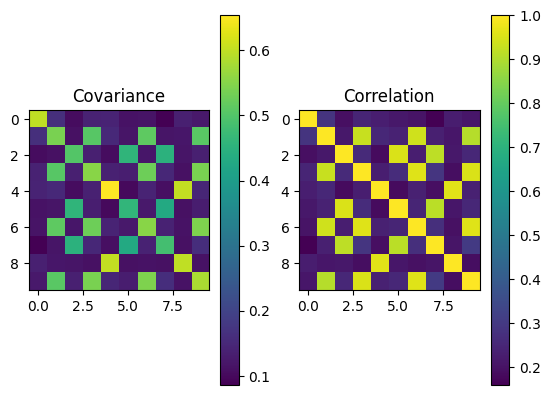

In [20]:
test_samples, test_scores, test_mode_idx = generator.sample(10)

test_samples = test_samples.to(device)
test_scores = test_scores.to(device)

_, test_features = model(test_samples)

test_features = test_features.detach().cpu().numpy()

cov = np.cov(test_features)
corr = np.corrcoef(test_features)

print(test_mode_idx)

plt.subplot(1, 2, 1)
plt.imshow(cov)
plt.colorbar()
plt.title('Covariance')
plt.subplot(1, 2, 2)
plt.imshow(corr)
plt.colorbar()
plt.title('Correlation')
plt.show()